# Everything We Know About The Neutron Generator
*2016/09/28 Jacques, Erik, Darryl, Lotfi, Gianmarco*


In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important;}</style>")
HTML('''<script>
code_show=false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle the code"></form>''')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ROOT as ROOT
import datetime
from root_numpy import root2array, tree2array
import pandas as pd
plt.rc('font', size=16)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
%matplotlib inline

## Introduction

In this note we discuss the work that has been done to characterize the Neutron Generator. We list the three main results of interest

1.) A functional fit to the neutron flux as a function of applied voltage and current

2.) The angular emisison spectrum of the neutron flux

3.) The energy spectrum of the nuetron flux.

## Data 

The analysis relies on measurements of the neutron flux made at both Purdue and the PTB.

### 1.) Purdue

Data was collected at Purdue using 3, 3" EJ-301 liquid scintillator cells. A total of 357 measurements were taken at varying settings of applied voltage and current to the neutron generator.

### 2.) PTB

Two weeks of facility time were available to us at the PTB during which we performed three different types of measurements. Data taken at the PTB were collected on three different types of detectors:

* A De Pangher Long Counter 
* A 2" cell of NE-213, for which the response function to mono-energetic neutrons is known 
* A 3" cell of EJ-301 from Purdue, to compare consistency between PTB and Purdue measurements

Measurements taken at PTB fall into three categories:

#### Angular Scan

During this measurement, the Long Counter was placed at a consistent radial distance from the neutron producing region of the generator. The co-ordinate system used in the experimental hall is defined such that 90$^{\circ}$ is when the line between the center of the Long Counter and the the neutron producing region, is parallel with the axis of the generator, and the Long Counter is at the LV connection end of the generator. Correspondingly -90$^{\circ}$ is when the Long Counter is at the HV end of the generator. If the line between the neutron producing region and the center of the Long Counter is perpendicular to the axis of the neutron generator the angle is reported as 0$^{\circ}$.

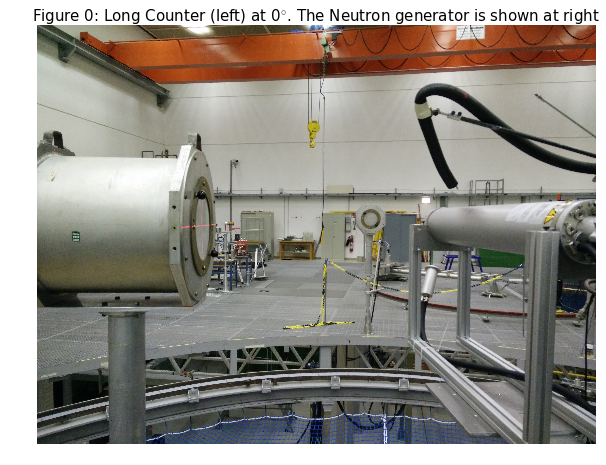

In [2]:
plt.rcParams['figure.figsize']=(10.0, 10.0)
plt.imshow(mpimg.imread('plots/LC_0_NG.png'))
plt.title("Figure 0: Long Counter (left) at 0$^{\circ}$. The Neutron generator is shown at right", fontsize =15)
plt.axis('off')
plt.show()

Measurements were taken at 10$^{\circ}$ intervals between -60$^{\circ}$ and 90 $^{\circ}$. Due to conflicts between the mechanical arms on which various sensors were mounted at PTB we could not measure down to -90$^{\circ}$. According to all the information obtained from the manufacturer about the internal construction of the neutron generator it is radially symmetric, therefore the angular scan was not extened beyond 90$^{\circ}$. For each of these angular measurements the EJ-301 sensor was in place at 140$^{\circ}$ to measure the consistency of the neutron flux across the scan.

#### Energy Measurements

After completion of the angular scan measurement, we placed the NE-213 detector at a radial distance of 1.5m from the neutron producing region at 0$^{\circ}$ and dedicated measurements were taken to measure the energy spectrum. This detector was left in place for subsequent measurements. This detcetor was also left in place during subsequent absiluate rate measurements.

#### Absolute rate measurements

In the remaining facility time, we took measurements at as many voltage and current settings as we could reasonably manage to produce an absolute scaling factor to apply to the Purdue data.

## Functional Dependence of Neutron Flux on Applied Voltage and Current 

### Purdue data
Many datasets were collected at Purdue over the full range of voltage and current settings. Due to the large amount of shine from the walls of the small room we used, we cannot use this data to determine the absolute flux scale but we can measure the functional dependence. Also due to the shine, the distance relationship is not 1/$r^2$, so we cannot accurately combine results from measurements made at different values of $r$. We select runs in a narrow distance range around r=260mm, and where |z| < 100mm to ensure we don't have effects from the angular spectrum. We also cut runs where we tested the generator without cooling. Due to some issues with our setup, not all runs have good slow control values, and we cut those as well.

Slow control voltage measurements are averaged together for each run via $V_{\mathrm{ave}}^p = \Sigma \frac{V^p}{n}$, where $p$ is taken as 3.33 using an iterative process.

After selecting appropriate runs, we are left with 107 datasets with livetime 55.3 hours. From each run we select events above a 50 keV threshold that pass 99.5% gamma rejection.

To this data we fit a function of the form $F(V,I) = aV^bI^c$. The values we get for $a$ are meaningless here, but for $b$ we find an average of $3.33\pm0.02$ and $c$ $0.98\pm0.01$.

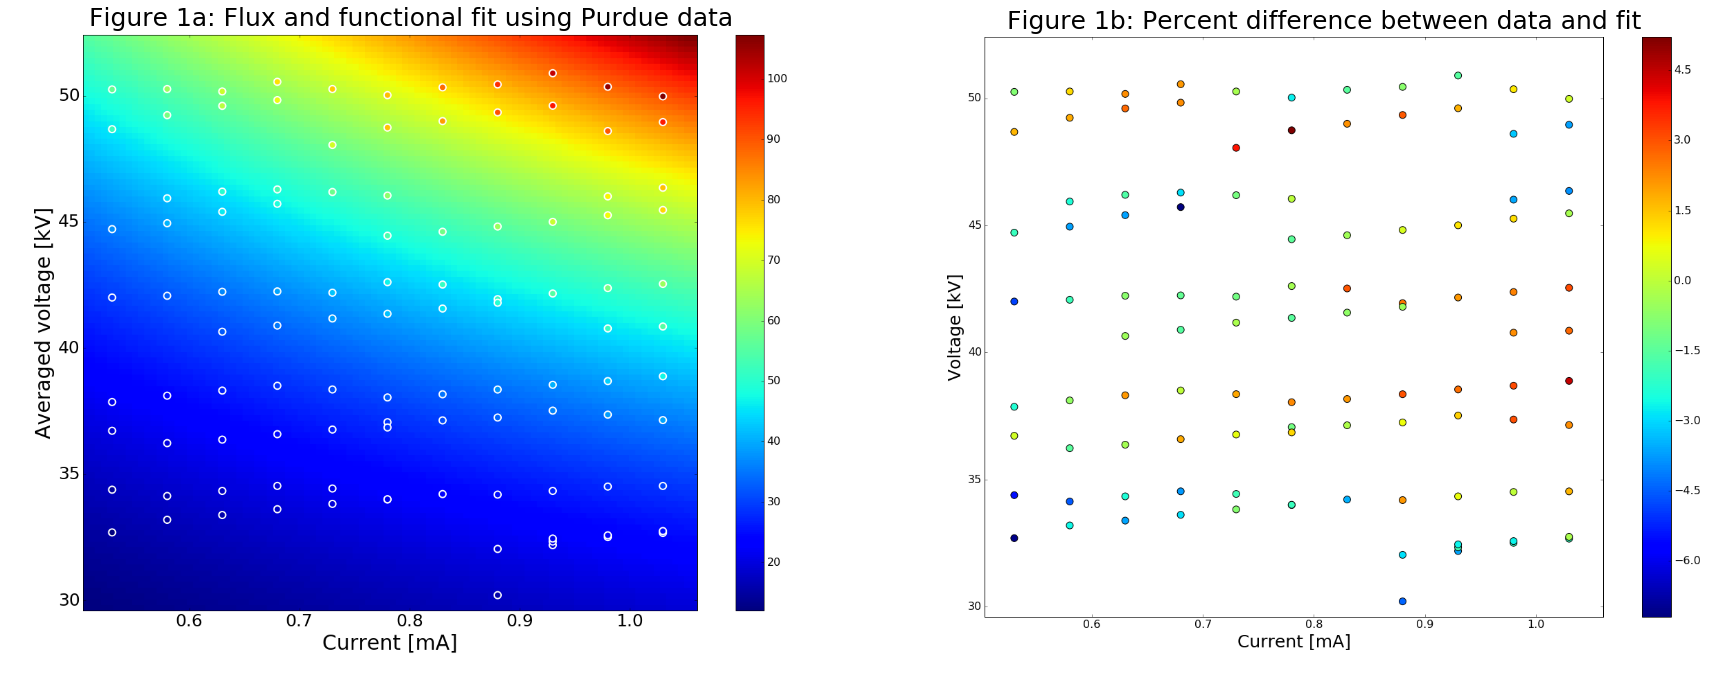

In [3]:
fig = plt.figure(figsize=(30,15))
ax = []
ax.append(fig.add_subplot(1,2,1))
plt.imshow(mpimg.imread('plots/fluxandfit.png'))
plt.title('Figure 1a: Flux and functional fit using Purdue data',fontsize=25)
plt.axis('off')

ax.append(fig.add_subplot(1,2,2))
plt.imshow(mpimg.imread('plots/fiterror.png'))
plt.title('Figure 1b: Percent difference between data and fit',fontsize=25)
plt.axis('off')
plt.show()

Additionally, we have investigated systematic errors arising from the chosen value of $p$ used in averaging slow control voltage measurements and from the 50 keV energy threshold, and find no significant change in the fit results.

### PTB data

For the data taken at PTB, we have to apply no gamma discrimination since the detector used (the long counter) is only sensitive to neutrons. The data for the rate calibration was taken with the detector in the same place. The exponents we obtain using only this data is 3.31 for the voltage and 1.03 for the current, consistent with the Purdue data.

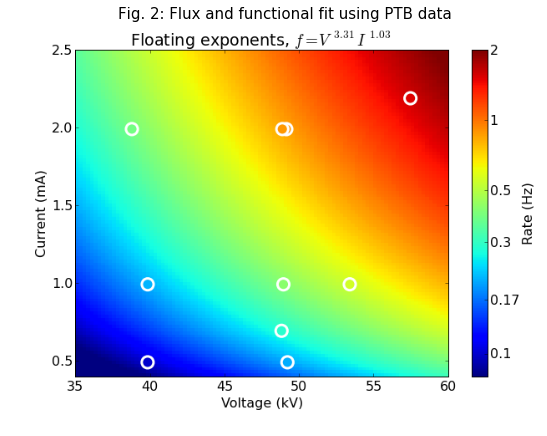

In [4]:
fig = plt.figure(figsize=(10,7))
plt.imshow(mpimg.imread('plots/PTB_rate_UI.png'))
plt.title('Fig. 2: Flux and functional fit using PTB data',fontsize=15)
plt.axis('off')
plt.show()

## Angular Emission Spectrum

The results of the angular spectrum performed at PTB are shown in Figure 4. The data were collected using the PTB Long Counter to measure the flux accurately. The Long Counter was mounted on a movable arm, which was adjusted to the desired angle between measurements. The neutron generator remained running between measurements wherever possible (only being shutdown because of a period of unstable behaviour on the 25th of May in the afternoon, overnight on the 25th of May due to safety restrictions at PTB, and over lunch on the 26th again due to safety restrictions.) 

During initial start-up before the period of instability mentioned on the 25th, the stability of the neutron generator was not very good. The three data sets taken during this time have been indicated as "Suspicious". For all the data sets used here, the EJ-301 scintillator was also in place, at an angle of 140$^{\circ}$. The EJ-301 scintillator was not moved between data sets, and is used to check the stability of the neutron flux across Long Counter measurements.

Initially no lead shielding was avaialable to suppress the high rate of Bremsstrahlung produced by the nuetron generator. This high background rate could conceivably lead to an increased number of neutrons leaking into the nuetron band in the discrimination space. Therefore these data sets are marked as "No Lead".

Both data taken with the Long Counter and the EJ-301 detector have been corrected for the average weighted voltage and current throughout the measurements. Here we assume the functional dependence to be  ∝V$^{3.33}$I$^{0.9715}$, using the result from the fit to the Purdue data. The neutron rate taken from data collected with the EJ-301 detector, has been determined using a Laplace based method of Pulse-Shape Discrimination developed at Purdue. The measured angular spectrum is shown in Figure 4, as well as the corresponding flux in the EJ-301 detector at each measurement.

In [5]:
def convert_sc_time(s):
    '''
    Take a string in the format of SC program and convert it to something sensible.
    Example string: "b'25.05.2016 13:30:56"
    '''
    # Cut off b' part
    s = s[2:]
    day = int(s[0:2])
    month = int(s[3:5])
    year = int(s[6:10])
    hour = int(s[11:13])
    minute = int(s[14:16])
    second = int(s[17:19])
    return datetime.datetime(year,month,day,hour,minute,second)

def convert_count_time(date,time):
    '''
    Take string in format of counter and convert it.
    '25-MAY-2016', '15:44:54'
    '''
    day = int(date[0:2])
    month_str = (date[3:6])
    if month_str == 'MAY':
        month = 5
    else:
        raise ValueError("What? How dare you operate outside of May?!")
    year = int(date[-4:])
    hour = int(time[0:2])
    minute = int(time[3:5])
    second = int(time[6:8])
    return datetime.datetime(year,month,day,hour,minute,second)

def append_to_array(array,column,name):
    '''
    Append a column to a numpy array.
    DISCLAIMER this will probably be VERY slow for large arrays, because the code is ugly... 
    If you know a better way, PLEASE tell me!
    '''
    # This gives you a // list // of dtypes
    dt_old = array.dtype.base.descr
    # Detect current type and 
    dtype = tuple((name,column.dtype))
    
    # Now, we construct the dtype list for the NEW array
    # Lord knows why but we have to do it THIS way...
    dt_new = []
    for tup in dt_old:
        dt_new.append(tup)
    dt_new.append(dtype)
    array_new = np.zeros(len(array),dtype = dt_new)
    
    # After that we set the fields. 
    # Again... One by one...
    # TODO can this be faster?
    # Set the old fields
    for field_name in array.dtype.names:
        array_new[field_name] = array[field_name]
    # Set the new field
    array_new[dtype[0]] = column
    
    # Done!
    return array_new

In [7]:
sc_file = '../scripts_jp/PTB_DATA/Run01_160525.txt'
count_file = '../scripts_jp/PTB_DATA/2016_MAY_25/2016_MAY_25_3.MSa'

# Load SC data
dt = np.dtype([('date-time',np.str_,21),
               ('v', np.float64),
               ('v_set', np.float64),
               ('i', np.float64),
               ('i_set', np.float64),
               ('temp_basic', np.float64),
               ('temp_coset', np.float64),
               ('temp', np.float64),
              ])
data = np.loadtxt(sc_file, dtype=dt, delimiter = ',', skiprows=1, usecols=(0,1,2,4,5,8,9,10))
t = np.array([convert_sc_time(datetime) for datetime in data['date-time'] ])

#Load LC data
counts = []
with open(count_file) as f:
    i = 0
    for line in f:
        # Don't read the header
        if i==0:
            i = i+1
            continue
        # Split on spaces
        split_line = np.array(line.split(sep=' '))
        # Remove all the extra entries caused by spaces
        split_line = [x for x in split_line if x != '']
        
        dt = np.dtype([
                ('date',np.str_,20),
                ('time',np.str_,20),
                ('interval', np.float),
                ('gm_counts', np.int),
                ('lc_counts', np.int),
                ('end', datetime.datetime),
                ('start', datetime.datetime),
              ])
        d = np.zeros(1,dtype=dt)
        d['date']     = str(split_line[1])
        d['time']     = str(split_line[2])
        d['interval'] = 0.01*float(split_line[3])
        d['end']      = convert_count_time(d['date'][0],d['time'][0])
        d['start']    = d['end'][0] - datetime.timedelta(seconds = d['interval'][0])
        d['gm_counts']= int(split_line[7])
        d['lc_counts']= int(split_line[9])
        counts.append(d)

        i = i+1
counts = np.concatenate(counts)

# Remove periods of < 20 seconds. 
# This happens because of:
#   1. the program writes one sample right away (interval = 0)
#   2. we stop after some problem with DAQ

print("Read %d datasets, throwing away %d that are too short, %d left" % 
      (len(counts),len(counts[counts['interval'] <= 900.]),len(counts[counts['interval'] > 900.])))

counts = counts[counts['interval'] > 900.]


Read 30 datasets, throwing away 4 that are too short, 26 left


In [8]:
%%capture
setpoint_v35i1 = 50**(3.33)*2**1
for i, c in enumerate(counts):
    # Take the time range
    sel = (t > c['start']) & (t < c['end'])

    # Hack to skip funky measurement
    if i == 2:
        continue


    time_since_start = t[sel]
    time_since_start = [(timestamp - t[sel][0]).total_seconds() for timestamp in t[sel]]
    plt.plot(time_since_start,data[sel]['v']**(3.33)*data[sel]['i']**1,label=i)
    corr_factor = (np.average(data[sel]['v']**(3.33)*data[sel]['i']**1)/setpoint_v35i1)
#plt.gcf().autofmt_xdate()
plt.xlabel("Time (s)")
plt.ylabel("V^3.33 I^1")
#plt.legend()
plt.show()

In [9]:
%%capture
setpoint_v35i1 = 50**(3.33)*2**1

corr_factor = []
# lc_counts_corr = []
# lc_err = []
# lc_err_corr = []

for i, c in enumerate(counts):
    # Take the time range
    sel = (t > c['start']) & (t < c['end'])
    
    time_since_start = t[sel]
    time_since_start = [(timestamp - t[sel][0]).total_seconds() for timestamp in t[sel]]
    corr_factor_entry = 1/(np.average(data[sel]['v']**(3.33)*data[sel]['i']**0.9715)/setpoint_v35i1)
    print("Counts: %d, correction factor: %.5f, corrected counts: %.1f "
          % (c['lc_counts'],corr_factor_entry,corr_factor_entry*c['lc_counts']))
    
    corr_factor.append(corr_factor_entry)
    
counts = append_to_array(counts,np.array(corr_factor),'corr_factor')
counts = append_to_array(counts,counts['corr_factor'] * counts['lc_counts'],'lc_counts_corr')
counts = append_to_array(counts, np.sqrt(counts['lc_counts']) * counts['corr_factor'], 'lc_err_corr')
counts = append_to_array(counts, counts['lc_counts_corr'] / counts['interval'], 'lc_cps_corr' )
counts = append_to_array(counts, counts['lc_err_corr'] / counts['interval'], 'lc_cps_err_corr')


angles = np.array([0,10,20,30,40,50,60,70,0,0,-10,-20,-30,-40,-50,-60,0,10,20,80,90,30,40,50,60,70], dtype=float)
assert(len(angles) == len(counts))
counts = append_to_array(counts, angles, 'angle')

In [10]:
file_string = ['160525_1545', '160525_1609', '160525_1631', '160525_2008', '160525_2030', '160525_2051', '160525_2112', '160525_2133', '160526_0845', '160526_1114','160526_1135', '160526_1157', '160526_1342', '160526_1407', '160526_1429', '160526_1530', '160526_1553', '160526_1614', '160526_1635', '160526_1658', '160526_1833', '160526_1916', '160526_1938', '160526_1959', '160526_2020', '160526_2042']
path = '/data/NeutronGenerator/prodata/'
LAP_counts_100 =[]
for f in file_string:
    file_name = path+f+'.root'
    file=ROOT.TFile(file_name, 'read')
    file.ls()
    tree=file.Get('T2')
    tree.AddFriend('T1')
    thing=file.Get('T2')
    LAP_counts_100.append(tree.GetEntries("LAP[0]>1&&Integral[0]>50*0.0098938"))
    file.Close()

assert(len(LAP_counts_100) == len(counts))
counts = append_to_array(counts, counts['corr_factor'] * LAP_counts_100,'LAP_counts100_corr')
counts = append_to_array(counts, np.sqrt(LAP_counts_100) * counts['corr_factor'], 'LAP_err100_corr')
counts = append_to_array(counts, counts['LAP_counts100_corr'] / counts['interval'], 'LAP_cps100_corr' )
counts = append_to_array(counts, counts['LAP_err100_corr'] / counts['interval'], 'LAP_cps_err100_corr')

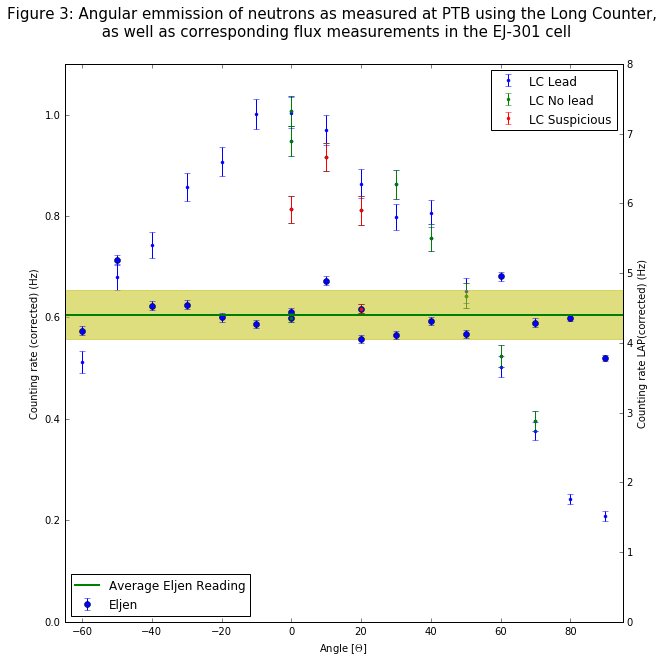

In [11]:
fig, ax1 = plt.subplots()
fig.suptitle("Figure 3: Angular emmission of neutrons as measured at PTB using the Long Counter, \n as well as corresponding flux measurements in the EJ-301 cell", size=15)
ax1.errorbar(counts['angle'],counts['lc_cps_corr'],yerr=counts['lc_cps_err_corr'], ls='None', marker='.',label='LC Lead')
ax1.errorbar(counts[0:10]['angle'],counts[0:10]['lc_cps_corr'],yerr=counts[0:10]['lc_cps_err_corr'], ls='None', 
             marker='.',color='green',label='LC No lead')
ax1.errorbar(counts[0:3]['angle'],counts[0:3]['lc_cps_corr'],yerr=counts[0:3]['lc_cps_err_corr'], ls='None', 
             marker='.',color='red',label='LC Suspicious')
ax1.set_xlabel("Angle [$\Theta$]")
ax1.set_ylabel("Counting rate (corrected) (Hz)")
ax1.set_ylim(0,1.1)
ax1.set_xlim(-65,95)
ax1.legend(numpoints=1, loc=1)

ax2 = ax1.twinx()
ax2.errorbar(counts['angle'],counts['LAP_cps100_corr'],yerr=counts['LAP_cps_err100_corr'], ls='None', marker='o',label='Eljen')
ax2.errorbar(counts[0:10]['angle'],counts[0:10]['LAP_cps100_corr'],yerr=counts[0:10]['LAP_cps_err100_corr'], ls='None', 
             marker='.',color='green')
ax2.errorbar(counts[0:3]['angle'],counts[0:3]['LAP_cps100_corr'],yerr=counts[0:3]['LAP_cps_err100_corr'], ls='None', 
             marker='.',color='red')
ax2.set_xlabel("Angle [$\Theta$]")
ax2.set_ylabel("Counting rate LAP(corrected) (Hz)")
ax2.set_ylim(0,8)
ax2.set_xlim(-65,95)


ax2.axhline(y=np.average(counts[9:25]['LAP_cps100_corr']), linewidth=2, color='g', label='Average Eljen Reading')
ax2.axhspan(ymin=np.average(counts[9:25]['LAP_cps100_corr'])-np.std(counts[9:25]['LAP_cps100_corr']), 
            ymax=np.average(counts[9:25]['LAP_cps100_corr'])+np.std(counts[9:25]['LAP_cps100_corr']),
           alpha=0.5, color='y')
ax2.legend(numpoints=1, loc=3)

Using the GEANT4 MC of the neutron generator, we simulate the data taking conditions. The MC is the same one included in the CalibrationSource class of the XENON1T MC. (Some small changes made in the last month have not yet been committed, mostly regarding the cathode and getter geometry. They will be included once this analysis is completed.)

The Long Counter is placed at the indicated angle of each measurement (where 0 degrees is perpendicular to the axis of the neutron generator) and a radial distance of 1.5 m between the front face of the Long Counter and the outside of the neutron generator at 0 degrees. The EJ-301 detector is also present in the simulation to attempt to account for any scattering off of the EJ-301 cell into the Long Counter as it approaches the EJ-301 cell.

The interactions of interest in the Long Counter are  10B(n,α)7Li10B(n,α)7Li . Consequently we search for any interaction which produced an  α  in the active volume of  BF3  gas at the center of the Long Counter. At each angle we simulate 10e8 neutrons, using the input energy spectrum described previously.

In order to normalise to the measured rate we divide by the ratio of the average number of counts in all the mc data sets relative to the average number of counts in all angular data measurements. Once we have a proper estimate for the backscatter rate, since we know the Long Counter's respons function, this normalisation can be replaced by an expected count rate, but for now I wanted to get a feel of how far off the result is. The results from the MC simulation is shown in Figure 5, overlayed on the Long Counter measurements from Figure 4.

In [12]:
lc_averages =[]
lc_averages_err=[]
for i in range (0, 6):
    lc_averages.append(counts['lc_cps_corr'][15-i])
    lc_averages_err.append(counts['lc_cps_err_corr'][15-1])
lc_averages.append(np.average([counts['lc_cps_corr'][0], counts['lc_cps_corr'][8], counts['lc_cps_corr'][9], counts['lc_cps_corr'][16]]))
lc_averages_err.append(np.sum([counts['lc_cps_err_corr'][0], counts['lc_cps_err_corr'][8], counts['lc_cps_err_corr'][9], counts['lc_cps_err_corr'][16]]))
for i in range (0, 2):
    lc_averages.append(counts['lc_cps_corr'][17+i])
    lc_averages_err.append(counts['lc_cps_err_corr'][17+i])
for i in range (0, 3):
    lc_averages.append(counts['lc_cps_corr'][21+i])
    lc_averages_err.append(counts['lc_cps_err_corr'][21+i])
lc_averages.append(np.average([counts['lc_cps_corr'][6], counts['lc_cps_corr'][24]]))
lc_averages_err.append(np.sum([counts['lc_cps_err_corr'][6], counts['lc_cps_err_corr'][24]]))
lc_averages.append(np.average([counts['lc_cps_corr'][7], counts['lc_cps_corr'][25]]))
lc_averages_err.append(np.sum([counts['lc_cps_err_corr'][7], counts['lc_cps_err_corr'][25]]))
for i in range (0, 2):
    lc_averages.append(counts['lc_cps_corr'][19+i])
    lc_averages_err.append(counts['lc_cps_err_corr'][19+i])
mc_counts = np.array([112, 328, 720, 953, 1166, 1244, 1396, 1450, 1431, 1355, 1396, 1326, 1200, 1080, 916, 625, 887, 848], dtype=np.float) 
mc_angles = np.array([-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60 , 70, 80, 90], dtype=float)
assert(len(mc_counts) == len(mc_angles)) 
mc_counts_cps = mc_counts/(np.average(mc_counts)/np.average(lc_averages))
mc_counts_err=np.sqrt(mc_counts)/(np.sum(mc_counts)/np.sum(lc_averages))    

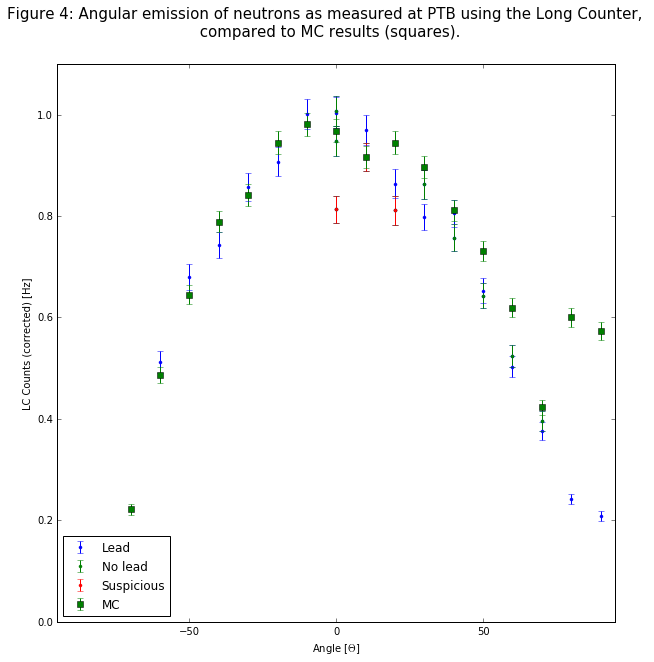

In [13]:
fig, ax1 = plt.subplots()
fig.suptitle("Figure 4: Angular emission of neutrons as measured at PTB using the Long Counter, \n compared to MC results (squares).", size=15)
ax1.errorbar(counts['angle'],counts['lc_cps_corr'],yerr=counts['lc_cps_err_corr'], ls='None', marker='.',label='Lead')
ax1.errorbar(counts[0:10]['angle'],counts[0:10]['lc_cps_corr'],yerr=counts[0:10]['lc_cps_err_corr'], ls='None', 
             marker='.',color='green',label='No lead')
ax1.errorbar(counts[0:3]['angle'],counts[0:3]['lc_cps_corr'],yerr=counts[0:3]['lc_cps_err_corr'], ls='None', 
             marker='.',color='red',label='Suspicious')
ax1.errorbar(mc_angles, mc_counts_cps,yerr=mc_counts_err, ls='None', marker='s',label='MC')
ax1.set_xlabel("Angle [$\Theta$]")
ax1.set_ylabel("LC Counts (corrected) [Hz]")
ax1.set_ylim(0,1.1)
ax1.set_xlim(-95,95)
ax1.legend(loc=3, numpoints=1)
plt.show()

The discrepancy at 80$^{\circ}$ and 90$^{\circ}$ has been tracked down to an insufficient description of the internal geometry of the getter pump module of the neutron generator in the MC. This is being corrected in conjunction with the manufacturer.

## Energy Spectrum

### Functional dependence of energy and angular emmision yield on angle
Experimental results of emission angles and energy of neutrons produced from DD fusion, produce parametrized distribution of neutrons. These results are obtained using ion beams incident on thin targets, which we assume to be a clsoe enough approximation in our case.

The angular distributions in the laboratory frame can be obtained from a Legendre Polynomial, where the yields have been normalized to the cross-section at 90 degrees, using:

\begin{equation}
R(\theta) = Y(\theta)/Y(90^{\circ}) = 1 + \sum\limits_{i=1}^n A_i cos^i \theta
\end{equation}


where $A$ = [1, 0.11787, 0.58355,-011353, 0.0422, 0.16359] for deuterons with an energy of $E_d$ = 50 keV. The cross-section at 90 degrees is $\sigma(90)$ = 4.2942 [mb/sr].

Given a collision angle and the energy of the incident deuteron, we can also calculate the energy of the resulting neutron, using a similar Legendre polynomial as for the angulare yield.

\begin{equation}
E_n(E_d, \theta) = E_0 \sum\limits_{i=1}^n E_i cos^i \theta
\end{equation}

where $E_i$ = [2.56703, 0.24848, 0.01282, 0.00031] for deuterons with an energy of $E_d$ = 50 keV. 

In Figure 1, we have plotted the resultant angular yield dependence and neutron energies for 50 keV deuterons. There is a functional dependence on the deuteron energy for the values of $A_i$ and $E_i$ which has not been accounted for here.

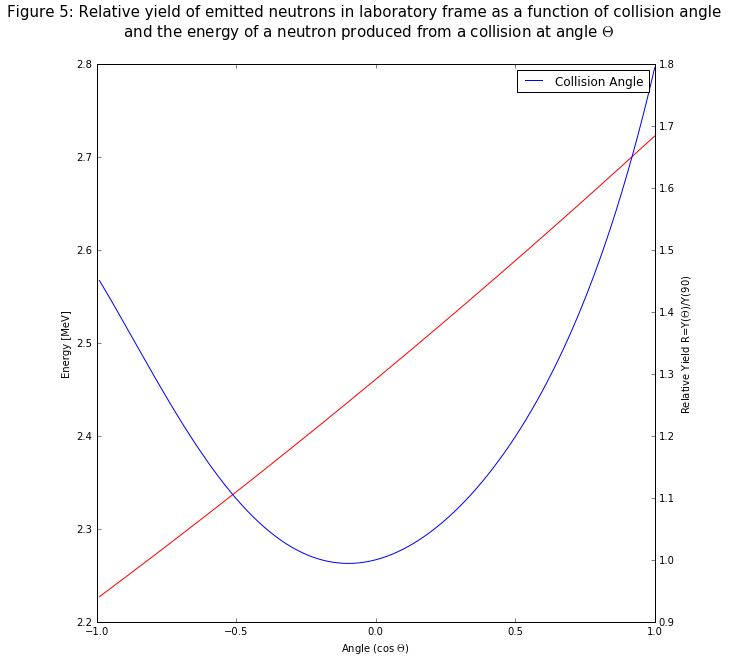

In [14]:
xE_points = []
yE_points = []
xCS_points = []
yCS_points = []
i =-1
for i in range (0, 200):
    x=(1-i/100)
    yE_points.append(2.46073+(0.24848*x+0.01282*np.power(x,2)+0.00031*np.power(x,3)))
    xE_points.append(x)
    yCS_points.append((1+0.11787*x+0.58355*np.power(x,2)+-0.11353*np.power(x,3)+0.0422*np.power(x,4)+0.16359*np.power(x,5)))
    xCS_points.append(x)

fig, ax1 = plt.subplots()
fig.suptitle("Figure 5: Relative yield of emitted neutrons in laboratory frame as a function of collision angle \n and the energy of a neutron produced from a collision at angle $\Theta$", size=15)
ax1.plot(xE_points, yE_points, color='red', label='Energy')
ax1.set_xlabel("Angle (cos $\Theta$)")
ax1.set_ylabel("Energy [MeV]")
ax1.set_ylim(2.2,2.8)
ax1.set_xlim(-1, 1)
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(xCS_points, yCS_points, color='blue', label='Collision Angle')
#ax2.set_xlabel("Angle (cos $\sigma$)")
ax2.set_ylabel("Relative Yield R=Y($\Theta$)/Y(90)")
ax2.set_ylim(0.9, 1.8)
ax2.set_xlim(-1, 1)
plt.legend(loc=0)
plt.show()



### Input Energy MC Spectrum

We would now like to intialise our MC with a more accurate neutron energy than the mono-energetic 2.5 MeV neutron beam that has been considered thus far. To do this we start by we generating random numbers between -1 and 1, (using the allowed range of cos $\theta$), which represents the collision angle between our two deuterons. We calculate the energy of a neutron produced from this collision using the second equation from the previous section. Additionally, we calculate a weighting factor for each collision based on the first equation of the previous section. We iterate 1e7 times. The result is the histogram obtained in Figure 2, normalized using the appropriate weighting factors.

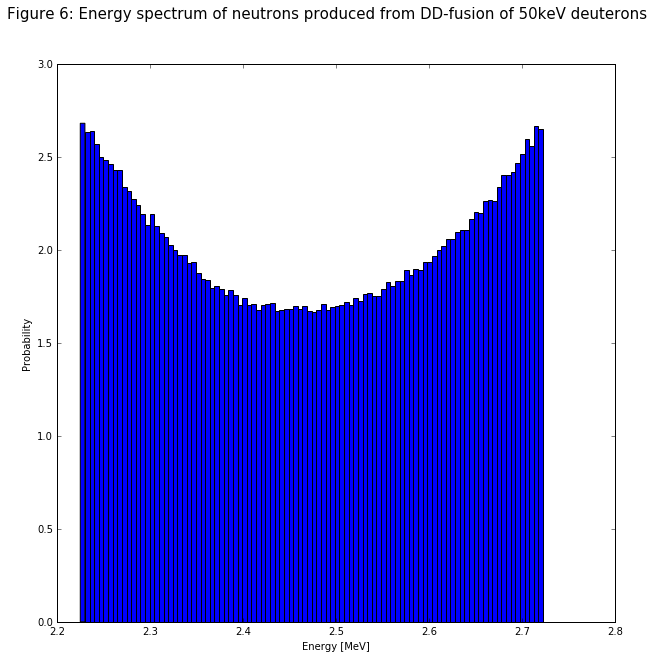

In [15]:
emission_prob = []
energies = []
i =-1
for i in range (0, 1000000):
    x=np.random.ranf()
    x=2*x-1
    weight=(1+0.11787*x+0.58355*np.power(x,2)+-0.11353*np.power(x,3)+0.0422*np.power(x,4)+0.16359*np.power(x,5))
    energy=(2.46073+(0.24848*x+0.01282*np.power(x,2)+0.00031*np.power(x,3)))
    energies.append(energy)
    emission_prob.append(weight)
fig, ax1 = plt.subplots()
fig.suptitle("Figure 6: Energy spectrum of neutrons produced from DD-fusion of 50keV deuterons", size=15)
(n, bins, patches)=ax1.hist(energies, bins= 100, normed=True, weights=emission_prob)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Energy [MeV]")
plt.show()

### Measured MC Energy Spectrum

The histogram from the previous section is then used as input in the GEANT4 MC description of the NeutronGenerator. The neutron energies to be simulated are sampled from this histogram.

A 2x2" cell of liquid scintillator is placed in the MC, such that its front face is at a distance of 2m from the Neutron Generator, at 0 degrees, as defined in the co-ordinate system used at the PTB (Perpendicular to the axis of the NG). The scintillator cell is filled with what is currently defined as EJ-301 in the MC, howevere this scintillator is essentially similar to NE-213, which is the scintillator used at the PTB for the energy measurement.

A total of 4e10 events were simulated. Only those events which have both passed through and interacted inside the volume of detector are considered here. Figure 8 shows the obtained energy spectrum of events at their first interaction point inside the detector.

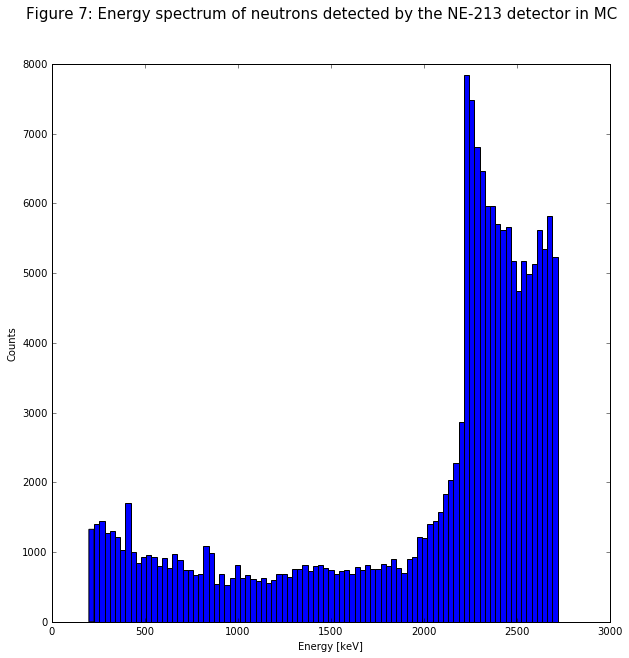

In [16]:
file = ROOT.TFile('/data/NeutronGenerator/scripts_jp/PTB_DATA/NE213_E_Spectrum.root', 'read')
file.ls()
tree=file.Get('T1')
thing=file.Get('T1')
nb_entries = tree.GetEntries()
#print (nb_entries)
mcdata = tree2array(tree, branches=['Incident_Energy'])
df = pd.DataFrame(mcdata)
fig, ax1 = plt.subplots()
fig.suptitle("Figure 7: Energy spectrum of neutrons detected by the NE-213 detector in MC", size=15)
(n_mc, bins_mc, patches_mc) = ax1.hist(df.Incident_Energy, bins=100, range = (200,3000))
ax1.set_ylabel("Counts")
ax1.set_xlabel("Energy [keV]")
plt.show()

### Measured Energy Spectrum in NE-213

The NE-213 detector measures both neutrons and gammas. The two event distributions can be distinguished using Pulse Shape Discrimination techniques. This data was collected using the PTB detector and DAQ systems, and the only information given is a 2d-histogram with counts per bin.

In order to reduce the background rate we define a 99% rejection level for gamma events as a function of energy (given in terms of keV$_{ee}$, as the response of NE-213 is known to be linear to gammas, but not to neutrons.) A background dataset is shown in Figure 9a. Also shown is the 99% rejection line. Figure 9b shows a data set collected while the neutron generator was running, with the rejection line for gamma events superimposed.

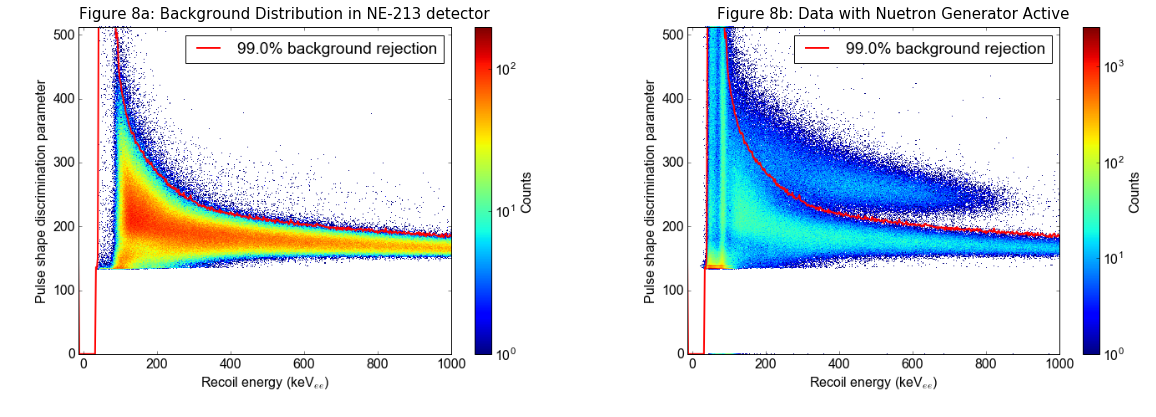

In [17]:
plt.rcParams['figure.figsize']=(20.0, 10.0)
ax1=plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread('../scripts_jp/hist2d_bg.png'))
plt.title("Figure 8a: Background Distribution in NE-213 detector", fontsize =15)
plt.axis('off')
ax2=plt.subplot(1, 2, 2)
plt.imshow(mpimg.imread('../scripts_jp/hist2d_ng.png'))
plt.title("Figure 8b: Data with Nuetron Generator Active", fontsize =15)
plt.axis('off')
plt.show()

The resulting acceptance of neutrons events is given in Figure 10. This is done by taking slices of the neutron distribution in energy and projecting it onto the discrimination parameter axis. A guassian is fitted to the resulting distribution, and an estimate is obtained for the fraction of the population that has been cut by the 99% rejection of gamma events. The resulting acceptance as a function fo energy is given in Figure 10.



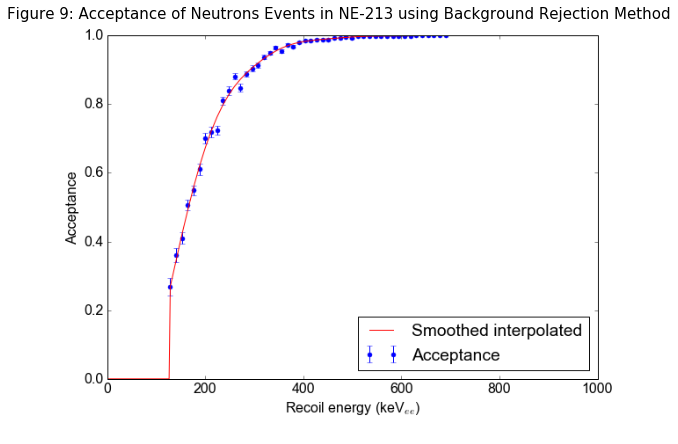

In [18]:
plt.rcParams['figure.figsize']=(10.0, 10.0)
plt.imshow(mpimg.imread('../scripts_jp/acceptance.png'))
plt.title("Figure 9: Acceptance of Neutrons Events in NE-213 using Background Rejection Method", fontsize =15)
plt.axis('off')
plt.show()

This measured energy spectrum from the MC simulation is convolved with the acceptance of the detector shown in Figure 10 and the known response of the NE-213 detector to neutrons of various energies. Figure 11 shows the resulting spectrum obtained from MC, and compares it to the measured spectrum. The agreement is quite good.

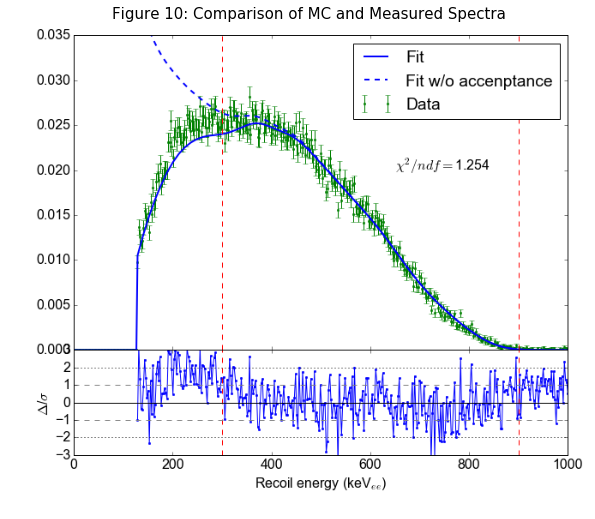

In [19]:
plt.rcParams['figure.figsize']=(10.0, 10.0)
plt.imshow(mpimg.imread('../scripts_jp/fit_with_acc.png'))
plt.title("Figure 10: Comparison of MC and Measured Spectra", fontsize =15)
plt.axis('off')
plt.show()

The DD fusion reaction produces a neutron and a $^3$He in 50% of reactions. The other 50% we obtain a proton and tritium. Over time the concentration of tritium inside the recation chamber of the neutron generator builds up. As a result we expect to have some contaimination of 14 MeV neutrons from DT fusion reactions. We have managed to measure this contribution to be at the 5% level.

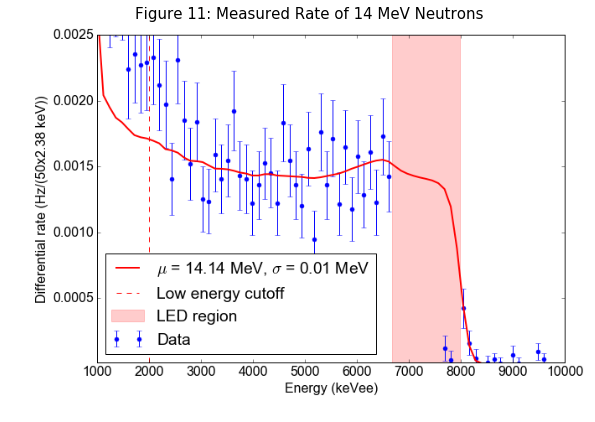

In [20]:
plt.rcParams['figure.figsize']=(10.0, 10.0)
plt.imshow(mpimg.imread('../scripts_jp/he_spec.png'))
plt.title("Figure 11: Measured Rate of 14 MeV Neutrons", fontsize =15)
plt.axis('off')
plt.show()